In [8]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np


In [9]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [10]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3192 files belonging to 2 classes.


In [12]:
class_names = dataset.class_names
class_names

['Monkeypox', 'Others']

In [13]:


import tensorflow as tf
print(tf.__version__)


2.13.0


In [14]:
len(dataset)

100

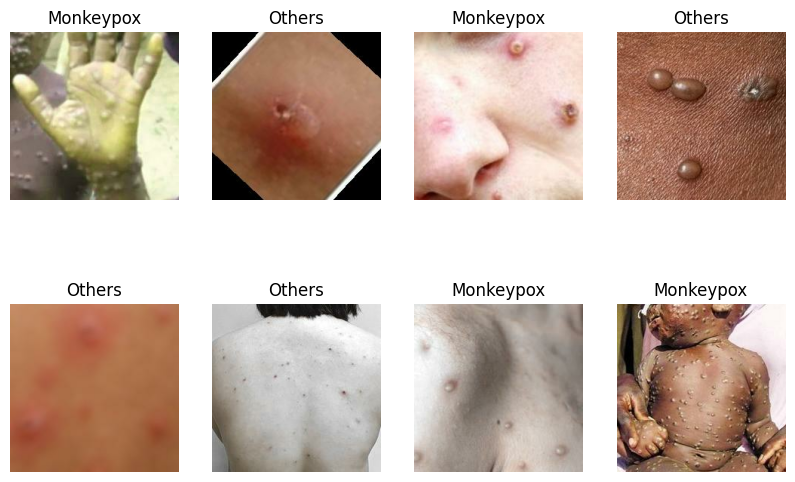

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [16]:
train_size = 0.8
len(dataset)*train_size

80.0

In [17]:
train_ds = dataset.take(80)
len(train_ds)

80

In [18]:
test_ds = dataset.skip(80)
len(test_ds)

20

In [19]:
val_size=0.1
len(dataset)*val_size

10.0

In [20]:
val_ds = test_ds.take(10)
len(val_ds)

10

In [21]:
test_ds = test_ds.skip(10)
len(test_ds)

10

In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, shuffle=True,shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size =int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [24]:
len(train_ds)

80

In [25]:
len(val_ds)

10

In [26]:
len(test_ds)

10

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),

])

In [30]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes=2
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes , activation='softmax'),
])
model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                 

In [32]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
80/80 [==============================] - 302s 3s/step - loss: 0.6696 - accuracy: 0.5858 - val_loss: 0.6604 - val_accuracy: 0.5833
Epoch 2/50
80/80 [==============================] - 259s 3s/step - loss: 0.6330 - accuracy: 0.6595 - val_loss: 0.6018 - val_accuracy: 0.7019
Epoch 3/50
80/80 [==============================] - 255s 3s/step - loss: 0.6143 - accuracy: 0.6716 - val_loss: 0.5983 - val_accuracy: 0.7083
Epoch 4/50
80/80 [==============================] - 200s 2s/step - loss: 0.5888 - accuracy: 0.6936 - val_loss: 0.5515 - val_accuracy: 0.7436
Epoch 5/50
80/80 [==============================] - 127s 2s/step - loss: 0.5862 - accuracy: 0.6979 - val_loss: 0.5396 - val_accuracy: 0.7244
Epoch 6/50
80/80 [==============================] - 135s 2s/step - loss: 0.5696 - accuracy: 0.7155 - val_loss: 0.5281 - val_accuracy: 0.7468
Epoch 7/50
80/80 [==============================] - 115s 1s/step - loss: 0.5655 - accuracy: 0.7042 - val_loss: 0.5471 - val_accuracy: 0.7436
Epoch 8/50
80

In [34]:
scores=model.evaluate(test_ds)

10/10 [==============================] - 28s 910ms/step - loss: 0.2297 - accuracy: 0.9031


In [35]:
scores

[0.2296973466873169, 0.903124988079071]

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 80}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

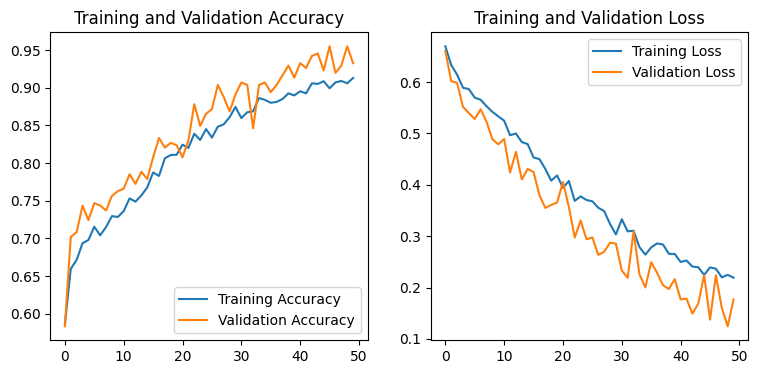

In [40]:
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label: Monkeypox
1/1 [==============================] - 1s 935ms/step
predicted label: Monkeypox


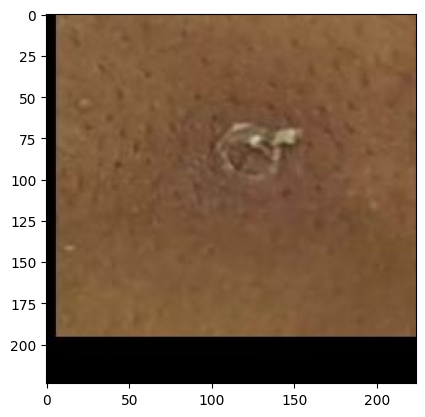

In [42]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.argmax(predictions[0])))
    return predicted_class,confidence

1/1 [==============================] - 0s 105ms/step


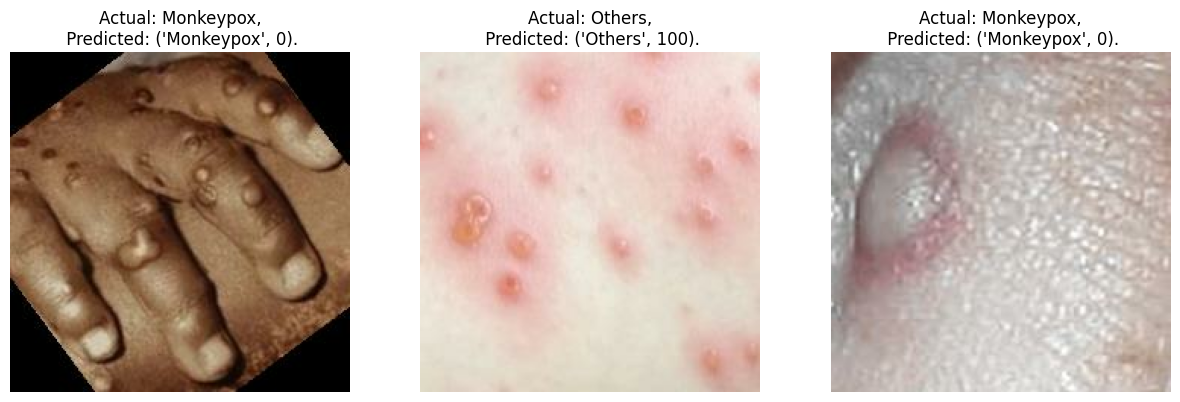

In [44]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.")
        plt.axis("off")

In [45]:
model_version =1
model.save(f"..models/{model_version}")

INFO:tensorflow:Assets written to: ..models/1\assets


INFO:tensorflow:Assets written to: ..models/1\assets


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
